https://medium.com/yottabytes/a-quick-guide-on-preprocessing-facial-images-for-neural-networks-using-opencv-in-python-47ee3438abd4

## A Quick Guide on Preprocessing Facial Images for Neural Networks using OpenCV in Python

TLDR: there are several steps which can fail..!

Covering face and eyes detection plus image straightening, cropping, resizing and normalization

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

(212, 318, 3)


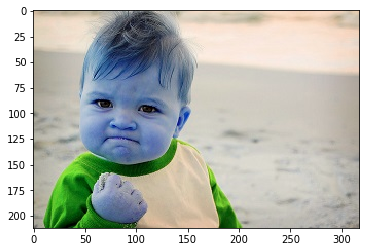

In [18]:
img = cv2.imread('SuccessKid.jpg', cv2.IMREAD_COLOR)
print(img.shape)
plt.imshow(img);

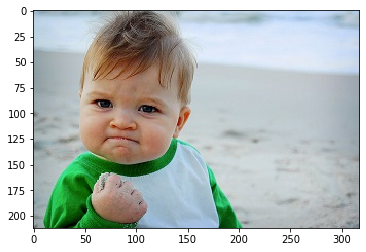

In [19]:
img = img[:,:,::-1]
plt.imshow(img);

NOTE that we cannot show images in jupyter notebook with opencv - the following will launch a window but hang the notebook

In [5]:
# cv2.imshow('', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Greyscale
Use greyscale to reduce noise in detection

(212, 318)


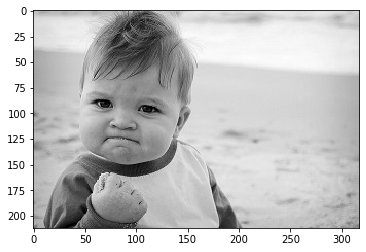

In [20]:
img = cv2.imread('SuccessKid.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray');

Now our image has a single channel!
## Face and eyes detection

When working on a facial classification problem we might want to do face detection in order to validate (is there a face?), crop and straighten our images. We’ll use the Haar Feature-based Cascade Classifier for Object Detection included in OpenCV for this.

In [22]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [23]:
faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

The result is an array containing all the detected faces, as rectangle positions. We can plot it easily:

In [25]:
faces_detected

array([[ 33,  53, 105, 105]], dtype=int32)

In [30]:
(x, y, w, h) = faces_detected[0]

For the eyes we proceed in a similar way, but narrowing the search to the face rectangle:

In [33]:
eyes = eyes_cascade.detectMultiScale(img[y:y+h, x:x+w])

In [34]:
eyes

array([[68, 33, 24, 24],
       [20, 21, 32, 32]], dtype=int32)

This approach can fail in practice, detecting nosrtils as eyes for example

## Face straightening

We can straighten a facial image once we’ve detected both eyes by calculating the angle between them (that’s an easy task). After the calculation we can rotate the image in only 2 steps: